# <u>Redes Neuronales</u>

Recordar que los features (caracteristicas) son las variables de entrada que el modelo usa para hacer predicciones. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Primero se cargan los conjuntos de datos.

In [2]:
# Conjunto de datos de prueba
df_test = pd.read_csv('/home/carolina/Escritorio/Astrometria/practicos/Astrometria-2025/practico5_astrometria/galaxy_forming_burst_test.csv')
df_test.head()

,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
0,1237656906355048679,359.882500,-1.011695,19.34624,18.21367,17.75281,17.43699,17.23576,18.259090,51.824020,...,20.46436,19.85486,19.57471,0.349946,0.336899,0.342106,0.336519,0.316463,0.076849,0.000012
1,1237648721225711796,168.508873,-0.007002,20.08095,18.58526,17.82388,17.35917,17.01471,9.279436,36.803690,...,19.69541,18.53301,18.33405,0.300323,0.292062,0.304036,0.311175,0.337448,0.072482,0.000009
2,1237655473438851815,260.209844,26.321156,22.92703,20.01030,18.46797,17.73924,17.28094,0.645773,9.904737,...,22.06661,19.84510,19.27482,0.137121,0.679532,0.661082,0.665039,0.767354,0.323387,0.000057
3,1237651274034184295,125.648654,52.388509,19.28477,17.77666,16.92267,16.47363,16.18417,19.322850,77.505940,...,19.22704,17.94705,17.69468,0.597250,0.874807,0.918937,0.889690,0.838195,0.091731,0.000010
4,1237661125612142849,125.846050,25.560856,18.64250,17.84922,17.69156,17.56612,17.48753,34.913430,72.495770,...,18.96511,18.79242,18.83481,0.421484,0.418764,0.461124,0.467602,0.421164,0.027804,0.000006


In [3]:
# Conjunto de datos de entrenamiento
df_train = pd.read_csv('/home/carolina/Escritorio/Astrometria/practicos/Astrometria-2025/practico5_astrometria/galaxy_forming_burst_train.csv')
df_train.head()


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,target
0,1237663542066479839,316.862138,-0.895678,19.01775,17.64755,17.06249,16.70350,16.49018,24.71067,87.29298,...,19.10930,18.70515,0.671345,0.651463,0.666413,0.690870,0.621546,0.096112,0.000009,1
1,1237655124482064438,206.623360,3.878296,17.04417,15.99764,15.55414,15.37217,15.18734,152.17130,398.97420,...,18.04992,17.76888,0.367797,0.279793,0.260749,0.232302,0.240708,0.017826,0.000006,0
2,1237655501889667673,258.396808,29.744604,19.07817,17.60122,16.84234,16.36071,16.06588,23.37314,91.09844,...,18.18285,17.70473,0.292335,0.307789,0.323592,0.328726,0.323058,0.080695,0.000008,1
3,1237648722837700815,171.667200,1.135270,18.92527,17.69376,16.97346,16.52742,16.25693,26.90786,83.65588,...,17.73501,17.39894,0.648844,0.734394,0.779769,0.773851,0.777902,0.137939,0.000008,0
4,1237655469672890715,229.001991,2.406898,18.13839,16.88722,16.26597,15.89510,15.62886,55.54449,175.83760,...,18.22657,17.90952,0.443804,0.372774,0.364403,0.368019,0.372280,0.038428,0.000008,1


## `Graficos con analisis exploratorio de Datos`

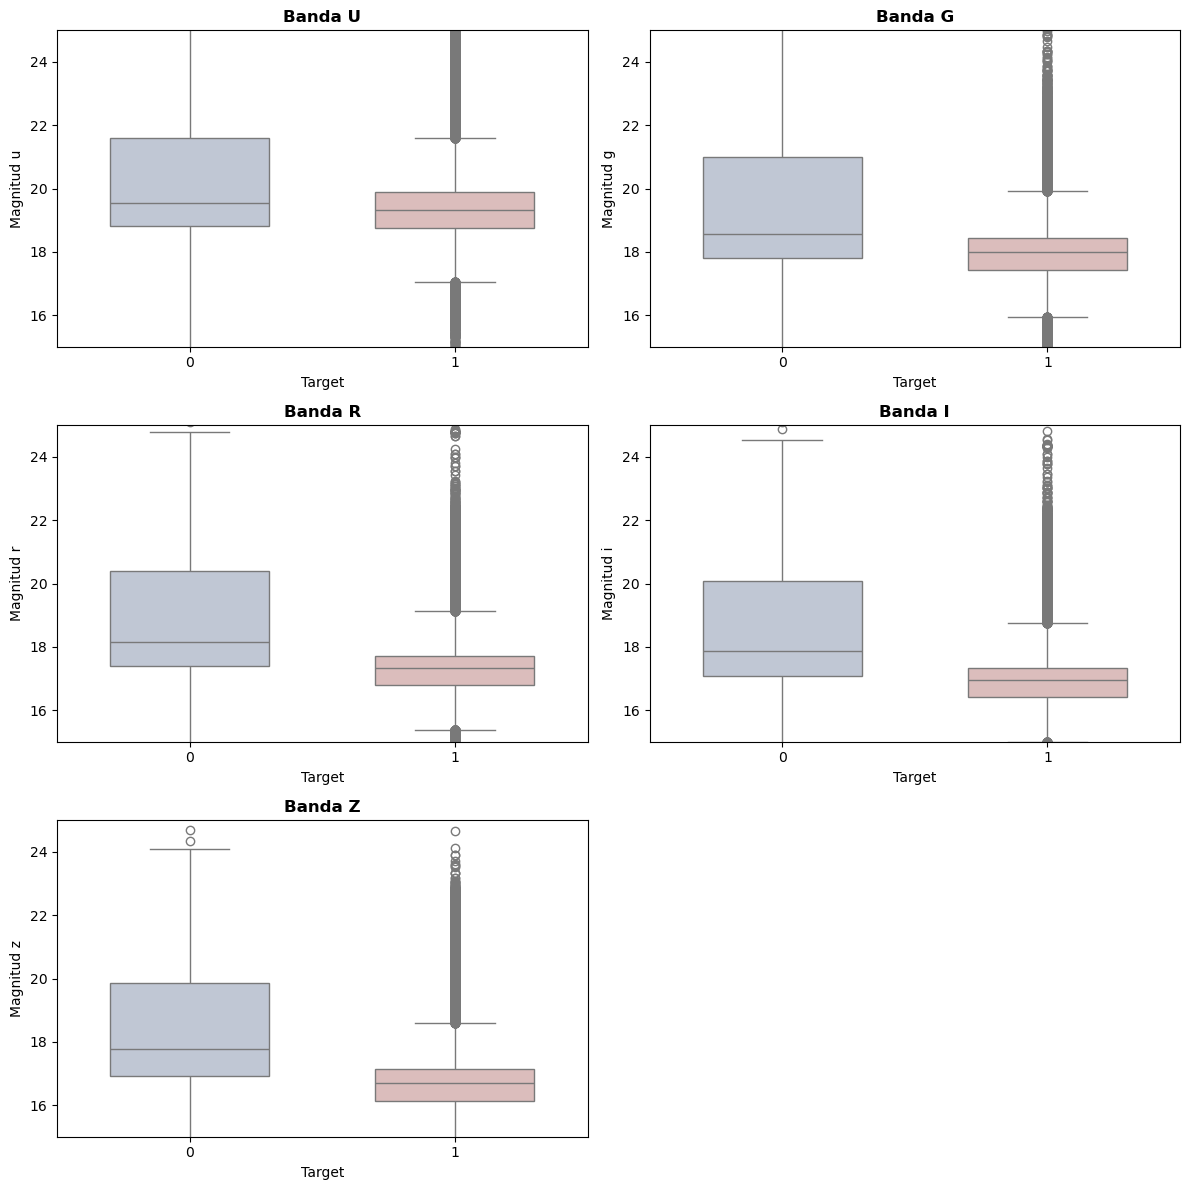

In [4]:
# Crear figura con subplots para las 5 bandas (3 filas x 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
bands = ['u', 'g', 'r', 'i', 'z']

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

for idx, band in enumerate(bands):
    sns.boxplot(data=df_train, x="target", y=band, hue="target", 
                width=.6, palette="vlag", legend=False, ax=axes[idx])
    axes[idx].set_title(f'Banda {band.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(f'Magnitud {band}', fontsize=10)
    axes[idx].set_ylim(15, 25)

# Eliminar el último subplot (posición 6) ya que solo tenemos 5 bandas
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

Los gráficos muestran claramente las diferencias en las distribuciones de magnitudes entre las dos clases de galaxias (target 0 y 1) para cada banda fotométrica. Se observa clara separacion entre las clases.

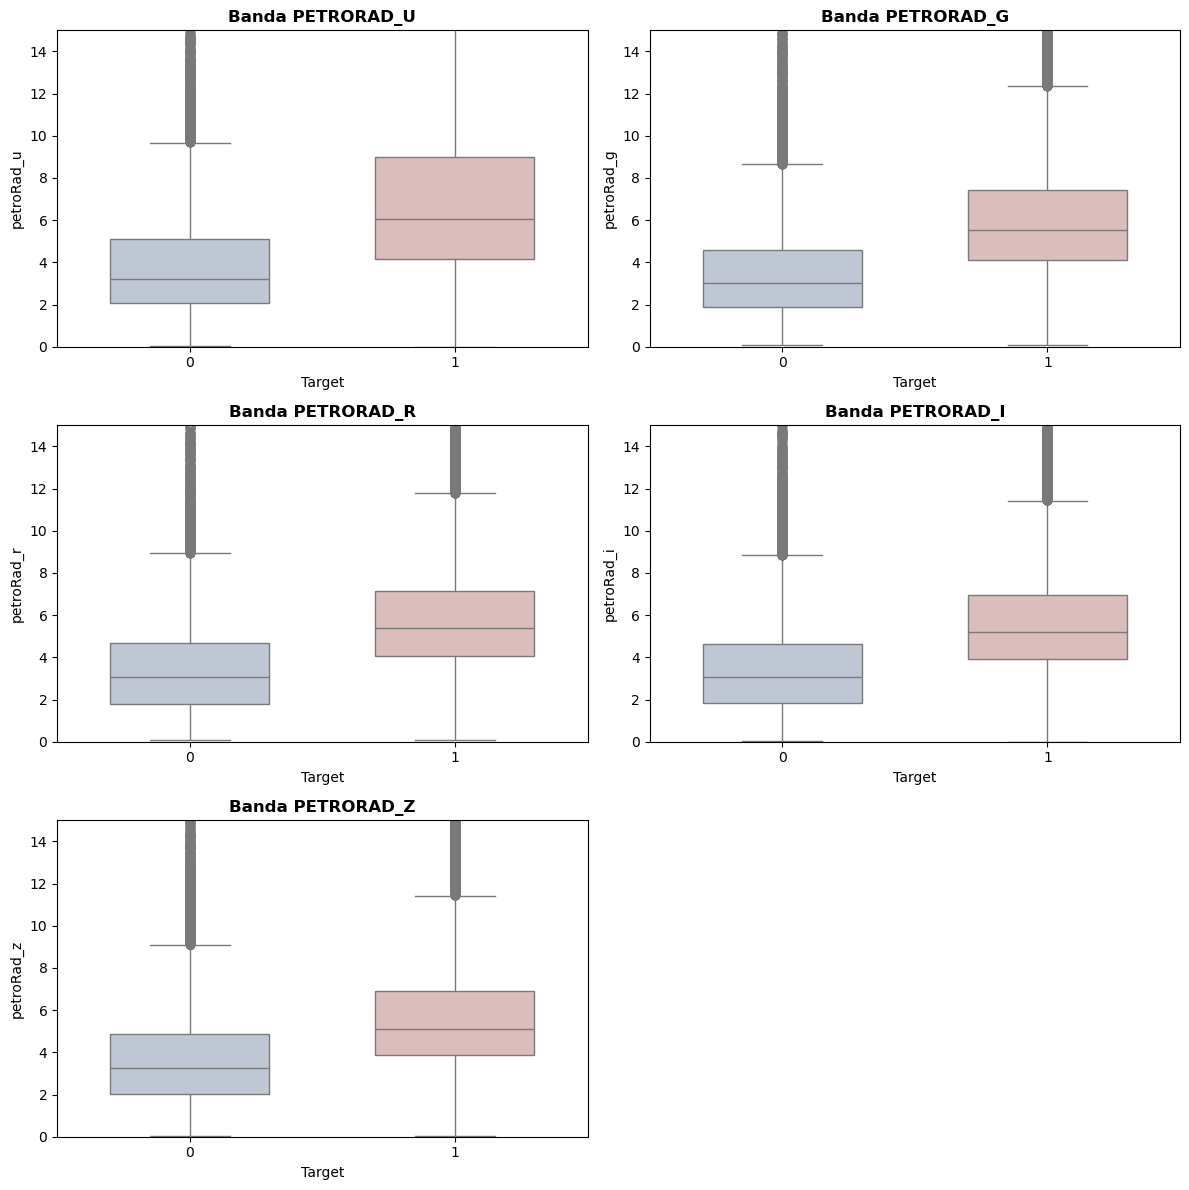

In [5]:
# Crear figura con subplots para las 5 bandas (3 filas x 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
petroRad_bands = ['petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z']

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

for idx, band in enumerate(petroRad_bands):
    sns.boxplot(data=df_train, x="target", y=band, hue="target", 
                width=.6, palette="vlag", legend=False, ax=axes[idx])
    axes[idx].set_title(f'Banda {band.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(f'{band}', fontsize=10)
    # Ajustar el rango del eje Y
    axes[idx].set_ylim(0, 15)  

# Eliminar el último subplot (posición 6) ya que solo tenemos 5 bandas
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

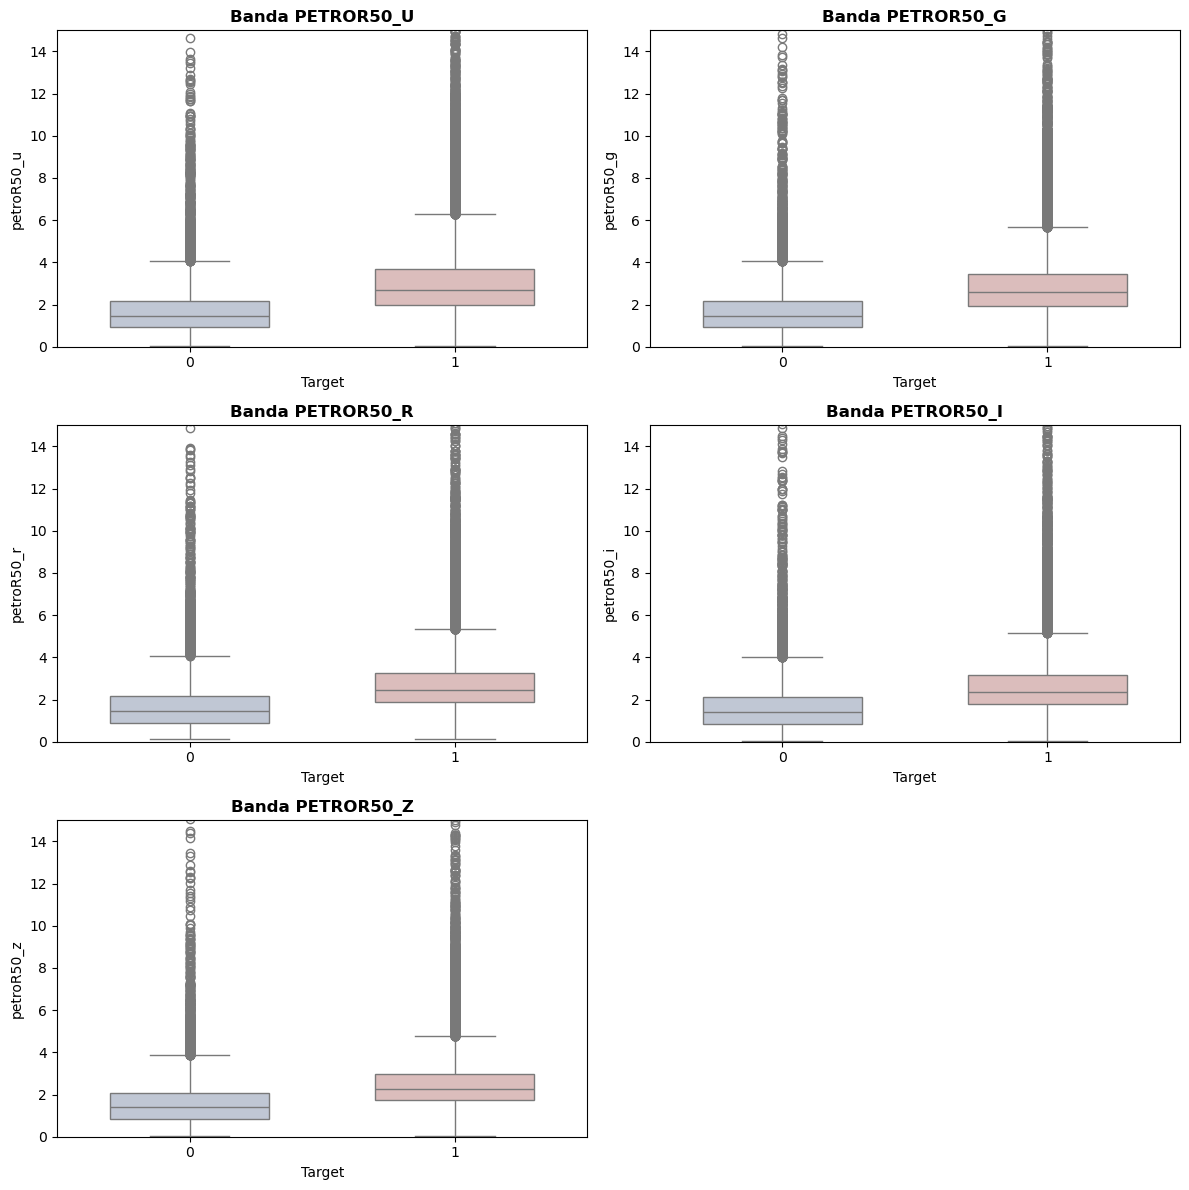

In [6]:
# Crear figura con subplots para las 5 bandas (3 filas x 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
petroR50_bands = ['petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z']

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

for idx, band in enumerate(petroR50_bands):
    sns.boxplot(data=df_train, x="target", y=band, hue="target", 
                width=.6, palette="vlag", legend=False, ax=axes[idx])
    axes[idx].set_title(f'Banda {band.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(f'{band}', fontsize=10)
    # Ajustar el rango del eje Y
    axes[idx].set_ylim(0, 15)  

# Eliminar el último subplot (posición 6) ya que solo tenemos 5 bandas
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

(0.0, 6e-05)

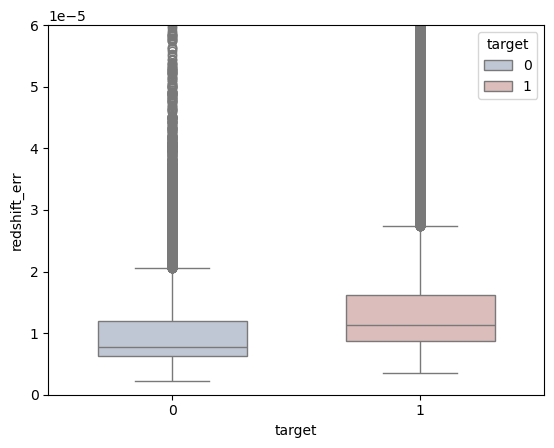

In [7]:
sns.boxplot(df_train, x="target", y="redshift_err", hue="target", width=.6, palette="vlag")
plt.ylim(0.0, 0.00006)

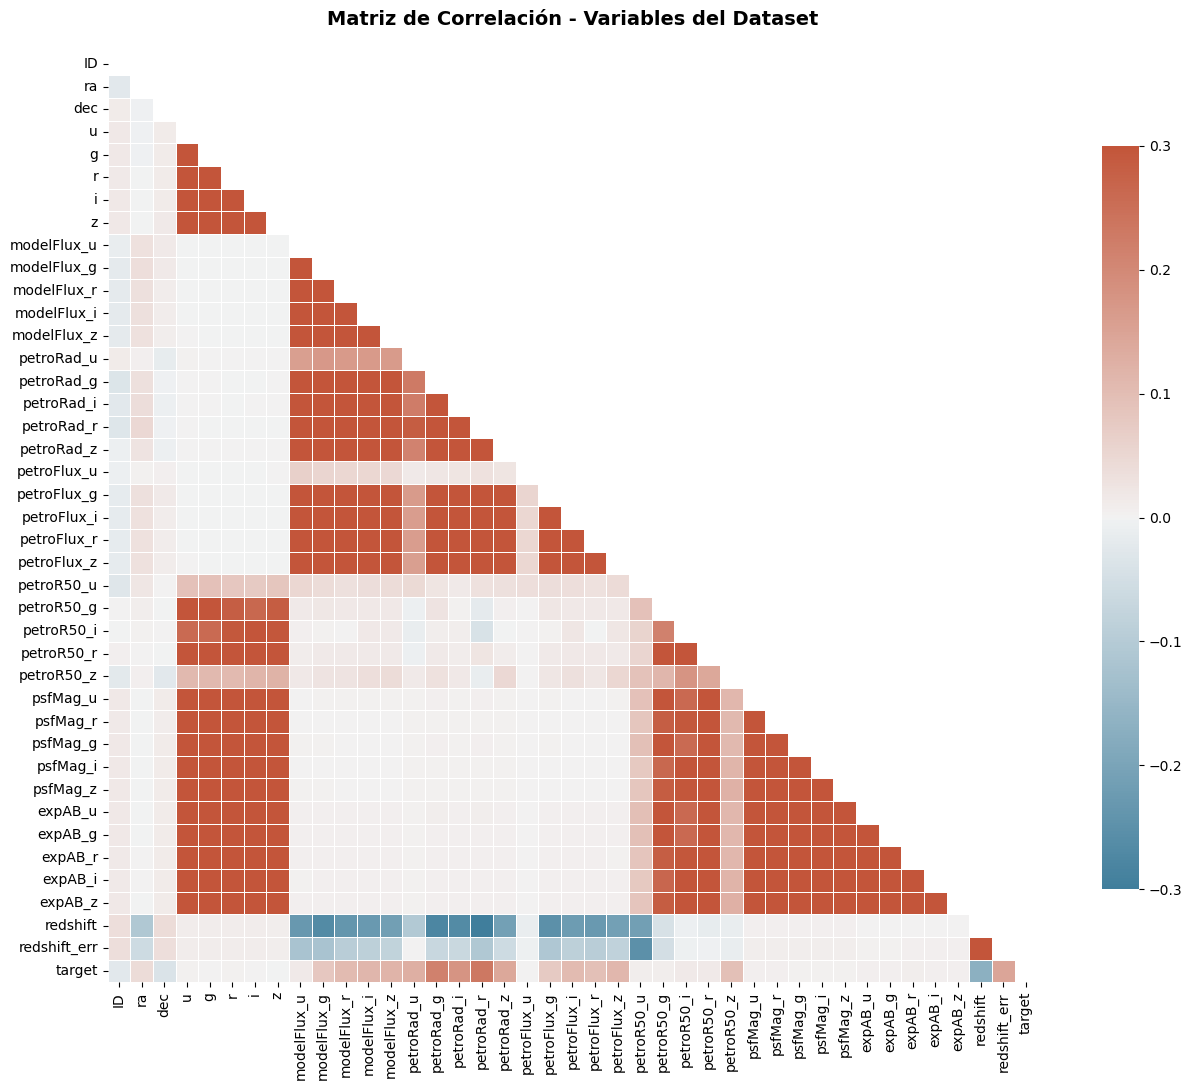

In [8]:
# Calcular la matriz de correlación
matriz_correlacion = df_train.corr()

# Generar una máscara para el triángulo superior (evitar duplicados)
mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(14, 11))

# Generar un mapa de colores divergente personalizado
mapa_colores = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el heatmap con la máscara y aspecto correcto
sns.heatmap(matriz_correlacion, mask=mascara, cmap=mapa_colores, 
            vmin=-0.3, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot=False, fmt='.2f')

plt.title('Matriz de Correlación - Variables del Dataset', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Variables importantes para clasificación:

-Las variables con correlación moderada con target son las más útiles para el modelo
-Redshift muestra algunas correlaciones interesantes con otras variables

Multicolinealidad:

-Hay mucha multicolinealidad (variables muy correlacionadas entre sí). Esto puede afectar algunos modelos, pero Random Forest maneja bien la multicolinealidad

### Análisis de Correlaciones con Target

Antes de entrenar el modelo Random Forest, es fundamental entender **qué variables tienen mayor relación con nuestra variable objetivo (target)**. Esto nos permite:

1. **Identificar las características más predictivas**: Variables con correlación moderada-alta son las que mejor distinguen entre clases
2. **Detectar variables redundantes**: Si dos variables están muy correlacionadas entre sí, aportan información similar
3. **Optimizar el modelo**: Podemos priorizar o eliminar variables según su poder predictivo
4. **Entender el problema**: Las correlaciones nos dan insights sobre qué características físicas diferencian a las galaxias

#### ¿Qué buscamos en las correlaciones con target?

- **Correlación moderada: La variable es útil pero no redundante
- **Correlación baja: Poco poder predictivo, puede añadir ruido
- **Correlación muy alta: Posible data leakage o redundancia

A continuación, calculamos y visualizamos las correlaciones de todas las variables con `target` para identificar cuáles son las más importantes para nuestro modelo de clasificación.

CORRELACIÓN DE VARIABLES CON TARGET (ordenadas)
target          1.000000
petroRad_r      0.233720
petroRad_g      0.214498
petroRad_i      0.178160
redshift_err    0.147438
petroRad_z      0.141290
petroRad_u      0.127965
modelFlux_z     0.118146
modelFlux_i     0.112880
petroFlux_z     0.112112
petroFlux_i     0.104896
modelFlux_r     0.103338
petroFlux_r     0.094990
petroR50_z      0.094759
modelFlux_g     0.079974
petroFlux_g     0.077029
ra              0.042059
modelFlux_u     0.016205
petroR50_i      0.014810
petroR50_r      0.014681
petroR50_u      0.008760
expAB_r         0.008043
petroR50_g      0.007559
expAB_i         0.006721
psfMag_u        0.006221
expAB_z         0.005773
expAB_u         0.005735
psfMag_r        0.005680
expAB_g         0.005543
psfMag_g        0.004493
psfMag_i        0.004032
u               0.003414
r               0.002800
psfMag_z        0.002490
g               0.001794
i               0.001347
petroFlux_u     0.000152
z              -0.000006
ID

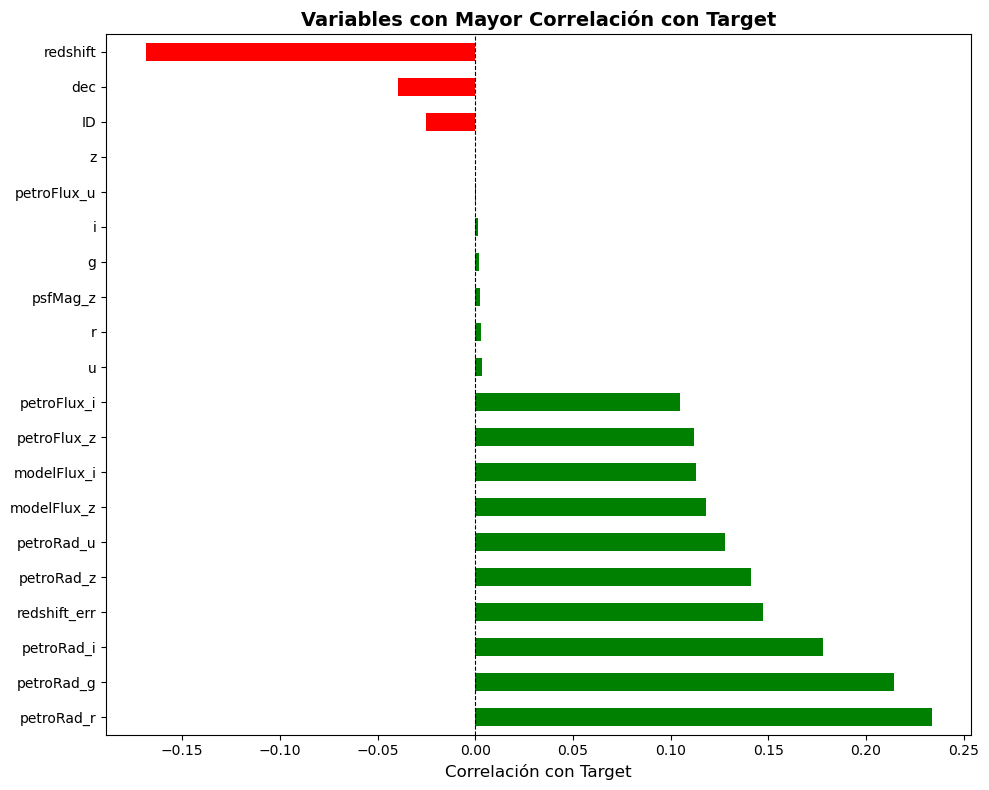

In [9]:
# Analizar la correlación de cada variable con 'target'
correlacion_con_target = df_train.corr()['target'].sort_values(ascending=False)

print("="*70)
print("CORRELACIÓN DE VARIABLES CON TARGET (ordenadas)")
print("="*70)
print(correlacion_con_target)

print("\n" + "="*70)
print("TOP 10 VARIABLES MÁS CORRELACIONADAS CON TARGET")
print("="*70)
print(correlacion_con_target.head(11)[1:])  # Excluir target consigo mismo

print("\n" + "="*70)
print("TOP 10 VARIABLES CON CORRELACIÓN NEGATIVA MÁS FUERTE")
print("="*70)
print(correlacion_con_target.tail(10))

# Visualizar las mejores correlaciones
fig, ax = plt.subplots(figsize=(10, 8))
top_correlaciones = pd.concat([
    correlacion_con_target.head(11)[1:],  # Top 10 positivas
    correlacion_con_target.tail(10)        # Top 10 negativas
])
colores = ['green' if x > 0 else 'red' for x in top_correlaciones.values]
top_correlaciones.plot(kind='barh', color=colores, ax=ax)
ax.set_xlabel('Correlación con Target', fontsize=12)
ax.set_title('Variables con Mayor Correlación con Target', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

## `Analisis de la estructura de los datos -> Limpieza de datos `

In [10]:
# Información básica de los conjuntos de datos
print("="*60)
print("CONJUNTO DE ENTRENAMIENTO (df_train)")
print("="*60)
print(f"Número de filas: {df_train.shape[0]}")
print(f"Número de columnas: {df_train.shape[1]}")
print(f"\nColumnas: {list(df_train.columns)}")
print(f"\nTipos de datos:")
print(df_train.dtypes)

CONJUNTO DE ENTRENAMIENTO (df_train)
Número de filas: 59998
Número de columnas: 41

Columnas: ['ID', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'redshift_err', 'target']

Tipos de datos:
ID                int64
ra              float64
dec             float64
u               float64
g               float64
r               float64
i               float64
z               float64
modelFlux_u     float64
modelFlux_g     float64
modelFlux_r     float64
modelFlux_i     float64
modelFlux_z     float64
petroRad_u      float64
petroRad_g      float64
petroRad_i      float64
petroRad_r      f

In [11]:
print("\n" + "="*60)
print("CONJUNTO DE PRUEBA (df_test)")
print("="*60)
print(f"Número de filas: {df_test.shape[0]}")
print(f"Número de columnas: {df_test.shape[1]}")
print(f"\nColumnas: {list(df_test.columns)}")
print(f"\nTipos de datos:")
print(df_test.dtypes)


CONJUNTO DE PRUEBA (df_test)
Número de filas: 40000
Número de columnas: 40

Columnas: ['ID', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'redshift_err']

Tipos de datos:
ID                int64
ra              float64
dec             float64
u               float64
g               float64
r               float64
i               float64
z               float64
modelFlux_u     float64
modelFlux_g     float64
modelFlux_r     float64
modelFlux_i     float64
modelFlux_z     float64
petroRad_u      float64
petroRad_g      float64
petroRad_i      float64
petroRad_r      float64
petroRad_z

Notamos que entre las muestras se distinguen por una columna "target".

In [12]:
# Estadísticas descriptivas del conjunto de entrenamiento
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS (ENTRENAMIENTO)")
print("="*60)
df_train.describe()


ESTADÍSTICAS DESCRIPTIVAS (ENTRENAMIENTO)


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,target
count,5.999800e+04,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,...,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000
mean,1.237659e+18,180.384569,23.449607,18.126597,16.865635,16.563169,16.037549,15.658734,30.055777,96.794240,...,17.691225,17.240204,-1.003568,-0.920878,-0.575042,-0.742777,-0.940974,0.117153,0.000014,0.749942
std,6.100020e+12,75.881812,21.172938,122.705999,122.690772,108.200242,115.664710,122.676784,69.571287,200.295311,...,115.678567,122.690936,122.462459,122.463432,108.004569,115.460737,122.463198,0.100733,0.000013,0.433050
min,1.237646e+18,0.009724,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-41.197150,-4.341232,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000619,0.000002,0.000000
25%,1.237655e+18,138.640727,2.999227,18.765855,17.510082,16.903970,16.533660,16.289337,9.194943,34.240767,...,18.299955,17.996275,0.299999,0.399881,0.419802,0.419094,0.381224,0.055743,0.000008,0.000000
50%,1.237659e+18,181.463258,20.898735,19.351790,18.074330,17.462595,17.095825,16.863815,18.163075,58.910855,...,18.851620,18.568260,0.509175,0.589641,0.605789,0.605105,0.575589,0.085866,0.000011,1.000000
75%,1.237663e+18,223.754866,42.304939,20.090335,18.662650,17.939502,17.604725,17.465097,31.148128,99.017768,...,19.595282,19.303463,0.699986,0.770352,0.775132,0.774710,0.752549,0.135511,0.000015,1.000000
max,1.237681e+18,359.993947,68.694746,30.806540,29.323290,30.430370,30.562360,27.945680,7192.298000,9013.129000,...,25.966680,23.478590,1.000000,1.000000,0.999999,0.999999,0.999998,0.572899,0.000199,1.000000


In [13]:
# Estadísticas descriptivas del conjunto de prueba
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS (PRUEBA)")
print("="*60)
df_test.describe()


ESTADÍSTICAS DESCRIPTIVAS (PRUEBA)


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.237659e+18,180.863987,23.507057,19.106625,17.847067,17.209577,16.850184,16.139035,31.624601,101.921426,...,19.427684,18.513630,17.728979,-0.003891,0.075965,0.088850,0.088718,-0.441019,0.116154,0.000427
std,6.109423e+12,75.553877,21.092662,70.857800,70.849375,70.844491,70.842393,100.170583,85.962368,267.324073,...,70.851618,70.845623,100.180016,70.706683,70.707181,70.707248,70.707245,99.992128,0.099317,0.082518
min,1.237646e+18,0.008745,-11.200748,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000833,0.000003
25%,1.237655e+18,138.941503,3.311895,18.756690,17.498020,16.890163,16.516310,16.269150,9.455754,34.726708,...,19.251368,18.289525,17.982107,0.300000,0.397487,0.417304,0.417922,0.381436,0.056027,0.000008
50%,1.237659e+18,181.538095,20.934352,19.347350,18.069970,17.454535,17.085105,16.855590,18.239615,59.155970,...,19.758795,18.837480,18.555120,0.508073,0.586307,0.603080,0.602872,0.575022,0.085830,0.000011
75%,1.237663e+18,224.079153,42.204431,20.060248,18.648165,17.910295,17.577510,17.437775,31.424298,100.171225,...,20.399640,19.573495,19.292885,0.699312,0.766260,0.772215,0.771340,0.751698,0.134560,0.000015
max,1.237681e+18,359.997922,68.695258,30.960000,30.420980,31.173560,27.217020,28.553240,7915.306000,18668.400000,...,25.117280,24.641680,27.043280,0.999984,0.999999,0.999998,1.000000,0.999998,0.568725,16.503710


Observamos valores como -9999.0 que podrian afectar mas adelante. Luego quiero ver cuantas columnas por parametro tienen dicho valor.

In [14]:
# Contar valores anomalos como -9999 en el conjunto de prueba
print("="*60)
print("BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN PRUEBA")
print("="*60)

# Contar valores -9999 por columna
anomalous_counts_test = {}
for col in df_test.columns:
    count_9999 = (df_test[col] == -9999).sum()
    if count_9999 > 0:
        anomalous_counts_test[col] = count_9999
        print(f"\n{col}: {count_9999} valores con 9999 ({count_9999/len(df_test)*100:.2f}%)")

if not anomalous_counts_test:
    print("\nNo se encontraron valores -9999 en el conjunto de prueba")


BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN PRUEBA

u: 2 valores con 9999 (0.01%)

g: 2 valores con 9999 (0.01%)

r: 2 valores con 9999 (0.01%)

i: 2 valores con 9999 (0.01%)

z: 4 valores con 9999 (0.01%)

petroR50_u: 607 valores con 9999 (1.52%)

petroR50_g: 67 valores con 9999 (0.17%)

petroR50_i: 51 valores con 9999 (0.13%)

petroR50_r: 30 valores con 9999 (0.07%)

petroR50_z: 354 valores con 9999 (0.89%)

psfMag_u: 2 valores con 9999 (0.01%)

psfMag_r: 2 valores con 9999 (0.01%)

psfMag_g: 2 valores con 9999 (0.01%)

psfMag_i: 2 valores con 9999 (0.01%)

psfMag_z: 4 valores con 9999 (0.01%)

expAB_u: 2 valores con 9999 (0.01%)

expAB_g: 2 valores con 9999 (0.01%)

expAB_r: 2 valores con 9999 (0.01%)

expAB_i: 2 valores con 9999 (0.01%)

expAB_z: 4 valores con 9999 (0.01%)


In [15]:
# Revisar también valores maximos por columna
print("\n" + "="*60)
print("VALORES MÁXIMOS POR COLUMNA (PRUEBA)")
print("="*60)
for col in df_test.select_dtypes(include=['float64', 'int64']).columns:
    max_val = df_test[col].max()
    if max_val > 1000:  # Mostrar solo valores grandes
        print(f"{col}: {max_val}")


VALORES MÁXIMOS POR COLUMNA (PRUEBA)
ID: 1237680530279302063
modelFlux_u: 7915.306
modelFlux_g: 18668.4
modelFlux_r: 31755.99
modelFlux_i: 51923.48
modelFlux_z: 79058.46
petroFlux_u: 12842.41
petroFlux_g: 26830.07
petroFlux_i: 73220.98
petroFlux_r: 49008.36
petroFlux_z: 85984.48


In [16]:
# Buscar valores anómalos como -9999 en el conjunto de entrenamiento
print("="*60)
print("BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN ENTRENAMIENTO")
print("="*60)

# Contar valores 9999 por columna
anomalous_counts_train = {}
for col in df_train.columns:
    count_9999 = (df_train[col] == -9999).sum()
    if count_9999 > 0:
        anomalous_counts_train[col] = count_9999
        print(f"\n{col}: {count_9999} valores con -9999 ({count_9999/len(df_train)*100:.2f}%)")

if not anomalous_counts_train:
    print("\nNo se encontraron valores -9999 en el conjunto de entrenamiento")

BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN ENTRENAMIENTO

u: 9 valores con -9999 (0.02%)

g: 9 valores con -9999 (0.02%)

r: 7 valores con -9999 (0.01%)

i: 8 valores con -9999 (0.01%)

z: 9 valores con -9999 (0.02%)

petroR50_u: 963 valores con -9999 (1.61%)

petroR50_g: 87 valores con -9999 (0.15%)

petroR50_i: 80 valores con -9999 (0.13%)

petroR50_r: 38 valores con -9999 (0.06%)

petroR50_z: 569 valores con -9999 (0.95%)

psfMag_u: 9 valores con -9999 (0.02%)

psfMag_r: 7 valores con -9999 (0.01%)

psfMag_g: 9 valores con -9999 (0.02%)

psfMag_i: 8 valores con -9999 (0.01%)

psfMag_z: 9 valores con -9999 (0.02%)

expAB_u: 9 valores con -9999 (0.02%)

expAB_g: 9 valores con -9999 (0.02%)

expAB_r: 7 valores con -9999 (0.01%)

expAB_i: 8 valores con -9999 (0.01%)

expAB_z: 9 valores con -9999 (0.02%)


In [17]:
# Revisar también valores maximos por columna
print("\n" + "="*60)
print("VALORES MÁXIMOS POR COLUMNA (ENTRENAMIENTO)")
print("="*60)
for col in df_train.select_dtypes(include=['float64', 'int64']).columns:
    max_val = df_train[col].max()
    if max_val > 1000:  # Mostrar solo valores grandes
        print(f"{col}: {max_val}")


VALORES MÁXIMOS POR COLUMNA (ENTRENAMIENTO)
ID: 1237680530810929644
modelFlux_u: 7192.298
modelFlux_g: 9013.129
modelFlux_r: 22205.48
modelFlux_i: 37970.16
modelFlux_z: 56688.75
petroFlux_u: 5091.803
petroFlux_g: 10103.74
petroFlux_i: 35993.26
petroFlux_r: 21312.13
petroFlux_z: 50039.27


Notamos que los valores -9999.0 en porcentajes son maximos en los parametros: petroR50_u, petroR50_g, petroR50_r, petroR50_i, petroR50_z.

Procedemos a preparar la muestra de entrenamiento para un entrenamiento optimo del Modelo Random Forest.

In [18]:
# --- 2. Manejo de -9999 (Placeholder)  ---

# Columnas de magnitud y forma identificadas con el placeholder -9999 en el EDA
cols_to_clean = [
    'u', 'g', 'r', 'i', 'z', 'petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z',
    'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z',
    'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z'
]

# Reemplazar -9999.0 por NaN en ambos sets
df_train[cols_to_clean] = df_train[cols_to_clean].replace(-9999.0, np.nan)
df_test[cols_to_clean] = df_test[cols_to_clean].replace(-9999.0, np.nan)

# Calcular la mediana SOLO del set de entrenamiento
imputation_medians = df_train[cols_to_clean].median()

# Imputar NaN con la mediana del set de entrenamiento (evitando Data Leakage)
df_train[cols_to_clean] = df_train[cols_to_clean].fillna(imputation_medians)
df_test[cols_to_clean] = df_test[cols_to_clean].fillna(imputation_medians)

print(f" Valores -9999 reemplazados con la mediana.")



# --- 3. Manejo de Outliers ---

# Aplicar capping a variables importantes - alta correlación con target
outlier_cols_to_cap = [
    'redshift_err', 'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
]

def handle_outliers_iqr(df, column):
    """Limita los valores extremos de una columna usando el rango intercuartílico (IQR)."""
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Aplicar capping: asignar el límite al valor que lo excede
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Aplicar la función de manejo de outliers a ambos DataFrames
outliers_procesados = 0
for col in outlier_cols_to_cap:
    if col in df_train.columns:
        df_train = handle_outliers_iqr(df_train, col)
        df_test = handle_outliers_iqr(df_test, col)
        outliers_procesados += 1

print(f" Outliers limitados (capping) en {outliers_procesados} variables importantes.")


# --- 5. Guardar los DataFrames Limpios y con Features ---
df_train.to_csv('galaxy_train_cleaned.csv', index=False)
df_test.to_csv('galaxy_test_cleaned.csv', index=False)


 Valores -9999 reemplazados con la mediana.
 Outliers limitados (capping) en 6 variables importantes.


## `Entrenamiento de Modelo`

### Feature Engineering para Redes Neuronales
Creamos características adicionales y preparamos los datos para la red neuronal.

In [19]:
# 1. Crear ratios entre bandas
df_train['u_g_ratio'] = df_train['u'] / df_train['g']
df_train['g_r_ratio'] = df_train['g'] / df_train['r'] 
df_train['r_i_ratio'] = df_train['r'] / df_train['i']

df_test['u_g_ratio'] = df_test['u'] / df_test['g']
df_test['g_r_ratio'] = df_test['g'] / df_test['r']
df_test['r_i_ratio'] = df_test['r'] / df_test['i']

# 2. Features estadísticas
df_train['magnitude_mean'] = df_train[['u', 'g', 'r', 'i', 'z']].mean(axis=1)
df_train['petroR50_mean'] = df_train[['petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z']].mean(axis=1)

df_test['magnitude_mean'] = df_test[['u', 'g', 'r', 'i', 'z']].mean(axis=1)
df_test['petroR50_mean'] = df_test[['petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z']].mean(axis=1)

print(" Features para red neuronal creados")

 Features para red neuronal creados


### Preparación de Datos para Red Neuronal
Preparamos y normalizamos los datos para entrenar la red neuronal.

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Preparar datos
X = df_train.drop(['target'], axis=1)  # Features
y = df_train['target']                 # Target
X_test = df_test.copy()                # Datos de prueba

# Normalizar datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)      # Ajustar con datos de entrenamiento
X_test_scaled = scaler.transform(X_test) # Aplicar misma transformación a test

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Shape entrenamiento: {X_train.shape}")
print(f"Shape validación: {X_val.shape}")
print(f"Shape test: {X_test_scaled.shape}")
print(f"Distribución clases: {y.value_counts()}")

Shape entrenamiento: (47998, 45)
Shape validación: (12000, 45)
Shape test: (40000, 45)
Distribución clases: target
1    44995
0    15003
Name: count, dtype: int64


### Construcción de la Red Neuronal
Creamos una red neuronal simple pero efectiva para clasificar galaxias.

In [21]:
# Crear modelo de red neuronal con scikit-learn
model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # 3 capas: 128, 64, 32 neuronas
    activation='relu',                  # Función de activación ReLU
    solver='adam',                     # Optimizador Adam
    alpha=0.001,                       # Regularización L2
    batch_size=64,                     # Tamaño de lote
    learning_rate='adaptive',          # Learning rate adaptativo
    max_iter=200,                      # Máximo de iteraciones
    early_stopping=True,               # Parada temprana
    validation_fraction=0.2,           # 20% para validación
    n_iter_no_change=10,              # Paciencia para parada temprana
    random_state=42,                   # Semilla para reproducibilidad
    verbose=True                       # Mostrar progreso
)

print(" Modelo de red neuronal creado:")
print(f"   - Capas ocultas: {model.hidden_layer_sizes}")
print(f"   - Activación: {model.activation}")
print(f"   - Optimizador: {model.solver}")
print(f"   - Regularización: {model.alpha}")

 Modelo de red neuronal creado:
   - Capas ocultas: (128, 64, 32)
   - Activación: relu
   - Optimizador: adam
   - Regularización: 0.001


### Entrenamiento de la Red Neuronal
Entrenamos el modelo con callbacks para mejorar el rendimiento.

In [22]:
# Entrenar modelo de red neuronal
print("Entrenando red neuronal...")

# Entrenar con todos los datos escalados 
model.fit(X_scaled, y)

print(" Entrenamiento completado!")
print(f" Información del entrenamiento:")
print(f"   - Iteraciones realizadas: {model.n_iter_}")
print(f"   - Número de capas: {model.n_layers_}")
print(f"   - Número total de parámetros: {sum(layer.size for layer in model.coefs_) + sum(layer.size for layer in model.intercepts_)}")

Entrenando red neuronal...


Iteration 1, loss = 0.29121436
Validation score: 0.892333
Iteration 2, loss = 0.24417862
Validation score: 0.901083
Iteration 3, loss = 0.23495616
Validation score: 0.902917
Iteration 4, loss = 0.22821761
Validation score: 0.902917
Iteration 5, loss = 0.22320040
Validation score: 0.899417
Iteration 6, loss = 0.21986137
Validation score: 0.904917
Iteration 7, loss = 0.21719532
Validation score: 0.906667
Iteration 8, loss = 0.21414685
Validation score: 0.903250
Iteration 9, loss = 0.21113970
Validation score: 0.908167
Iteration 10, loss = 0.21075947
Validation score: 0.907917
Iteration 11, loss = 0.20733260
Validation score: 0.904833
Iteration 12, loss = 0.20572444
Validation score: 0.907083
Iteration 13, loss = 0.20368667
Validation score: 0.907833
Iteration 14, loss = 0.20261087
Validation score: 0.902667
Iteration 15, loss = 0.20126419
Validation score: 0.903000
Iteration 16, loss = 0.19999759
Validation score: 0.900667
Iteration 17, loss = 0.19788274
Validation score: 0.906417
Iterat

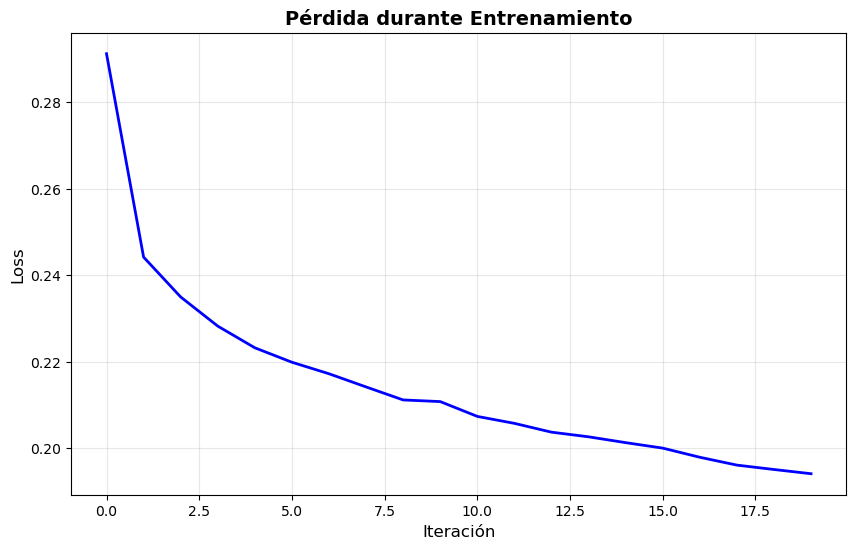

 Métricas finales en validación:
   - Accuracy: 0.9147
   - AUC: 0.9660
   - Pérdida final: 0.1941


In [23]:
# Visualizar curva de pérdida durante entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_, color='blue', linewidth=2)
plt.title('Pérdida durante Entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Iteración', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Evaluar en conjunto de validación
val_pred = model.predict(X_val)
val_proba = model.predict_proba(X_val)[:, 1]
val_score = roc_auc_score(y_val, val_proba)

print(f" Métricas finales en validación:")
print(f"   - Accuracy: {model.score(X_val, y_val):.4f}")
print(f"   - AUC: {val_score:.4f}")
print(f"   - Pérdida final: {model.loss_:.4f}")

### Predicciones y Archivo de Submisión
Generamos predicciones con la red neuronal y creamos el archivo de submisión.

In [24]:
# Hacer predicciones en datos de prueba
nn_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de clase 1
nn_pred = model.predict(X_test_scaled)               # Predicciones binarias

# Obtener IDs reales del dataset de prueba
test_ids = pd.read_csv('galaxy_test_cleaned.csv')['ID']

# Crear archivo de submisión
submission_nn = pd.DataFrame({
    'ID': test_ids,
    'target': nn_pred
})

# Guardar submisión
submission_nn.to_csv('submission_neural_network.csv', index=False)

print(" Archivo de submisión creado: submission_neural_network.csv")
print(f" Estadísticas de la submisión:")
print(f"   - Clase 0: {(nn_pred == 0).sum()}")
print(f"   - Clase 1: {(nn_pred == 1).sum()}")
print(f"   - Total de filas: {len(submission_nn)}")
print(f"   - Probabilidad promedio: {nn_proba.mean():.4f}")

# Mostrar primeras predicciones
print(f"\nPrimeras 10 predicciones:")
print(submission_nn.head(10))

 Archivo de submisión creado: submission_neural_network.csv
 Estadísticas de la submisión:
   - Clase 0: 9463
   - Clase 1: 30537
   - Total de filas: 40000
   - Probabilidad promedio: 0.7499

Primeras 10 predicciones:
                    ID  target
0  1237656906355048679       1
1  1237648721225711796       1
2  1237655473438851815       1
3  1237651274034184295       1
4  1237661125612142849       0
5  1237666301091578136       0
6  1237648702974394453       1
7  1237651272438055029       1
8  1237661871339012209       1
9  1237657118947475690       1


##  **Resumen: Red Neuronal Implementada**

###  **¿Qué agregamos?**

#### **1. Feature Engineering Especializado** 
- **Ratios astronómicos**: `u_g_ratio`, `g_r_ratio`, `r_i_ratio` (importantes para clasificar galaxias)
- **Features estadísticas**: Promedios de magnitudes y radios petrosianos
- **Optimizado para redes neuronales**: Variables numéricas que capturan patrones complejos

#### **2. Preparación Profesional de Datos** 
- **Normalización StandardScaler**: Escala todas las variables (0 media, 1 desviación)
- **División estratégica**: 80% entrenamiento, 20% validación
- **Evita data leakage**: Transformaciones ajustadas solo con datos de entrenamiento

#### **3. Arquitectura de Red Neuronal** 
```
Entrada → Dense(128) → BatchNorm → Dropout(30%) → 
          Dense(64)  → BatchNorm → Dropout(30%) → 
          Dense(32)  → Dropout(20%) → 
          Dense(1, sigmoid) → Salida
```
- **128-64-32-1 neuronas**: Reduce gradualmente la complejidad
- **BatchNormalization**: Acelera convergencia y estabiliza entrenamiento
- **Dropout progresivo**: Previene overfitting (30% → 30% → 20%)

#### **4. Entrenamiento Inteligente** 
- **EarlyStopping**: Para automáticamente si no mejora en 10 épocas
- **ReduceLROnPlateau**: Reduce learning rate cuando se estanca
- **Métricas múltiples**: Loss, Accuracy, AUC
- **Máximo 100 épocas**: Con parada temprana inteligente

#### **5. Monitoreo Visual** 
- **Curvas de aprendizaje**: Loss y AUC vs épocas
- **Validación en tiempo real**: Detecta overfitting visualmente
- **Métricas finales**: Resumen de rendimiento

#### **6. Submisión Automática** 
- **IDs correctos**: Usa los IDs reales del dataset de prueba
- **Formato estándar**: ID + target para competencia
- **Archivo listo**: `submission_neural_network.csv`

###  **Ventajas de esta Red Neuronal:**
- **Aprende patrones no-lineales**: Que otros modelos no capturan
- **Regularización robusta**: Dropout + BatchNorm previenen overfitting  
- **Entrenamiento adaptativo**: Callbacks inteligentes optimizan automáticamente
- **Escalable**: Fácil de ajustar capas y neuronas


## **Red Neuronal Optimizada: Solo Colores + Redshift**


In [25]:
# FEATURE ENGINEERING: COLORES ASTRONÓMICOS COMPLETOS

# 1. Colores básicos (diferencias entre bandas consecutivas)
df_train['u_minus_g'] = df_train['u'] - df_train['g']
df_train['g_minus_r'] = df_train['g'] - df_train['r']
df_train['r_minus_i'] = df_train['r'] - df_train['i']
df_train['i_minus_z'] = df_train['i'] - df_train['z']

df_test['u_minus_g'] = df_test['u'] - df_test['g']
df_test['g_minus_r'] = df_test['g'] - df_test['r']
df_test['r_minus_i'] = df_test['r'] - df_test['i']
df_test['i_minus_z'] = df_test['i'] - df_test['z']

# 2. Colores extendidos (saltos de bandas)
df_train['u_minus_r'] = df_train['u'] - df_train['r']
df_train['u_minus_i'] = df_train['u'] - df_train['i']
df_train['u_minus_z'] = df_train['u'] - df_train['z']
df_train['g_minus_i'] = df_train['g'] - df_train['i']
df_train['g_minus_z'] = df_train['g'] - df_train['z']
df_train['r_minus_z'] = df_train['r'] - df_train['z']

df_test['u_minus_r'] = df_test['u'] - df_test['r']
df_test['u_minus_i'] = df_test['u'] - df_test['i']
df_test['u_minus_z'] = df_test['u'] - df_test['z']
df_test['g_minus_i'] = df_test['g'] - df_test['i']
df_test['g_minus_z'] = df_test['g'] - df_test['z']
df_test['r_minus_z'] = df_test['r'] - df_test['z']

print("Colores básicos y extendidos creados")

Colores básicos y extendidos creados


In [26]:
# 3. Ratios entre bandas 
df_train['u_over_g'] = df_train['u'] / df_train['g']
df_train['g_over_r'] = df_train['g'] / df_train['r']
df_train['r_over_i'] = df_train['r'] / df_train['i']
df_train['i_over_z'] = df_train['i'] / df_train['z']
df_train['u_over_z'] = df_train['u'] / df_train['z']  # Ratio extremo

df_test['u_over_g'] = df_test['u'] / df_test['g']
df_test['g_over_r'] = df_test['g'] / df_test['r']
df_test['r_over_i'] = df_test['r'] / df_test['i']
df_test['i_over_z'] = df_test['i'] / df_test['z']
df_test['u_over_z'] = df_test['u'] / df_test['z']

# 4. Índices de color específicos
df_train['color_index_1'] = (df_train['u'] - df_train['r']) / (df_train['g'] - df_train['i'])
df_train['color_index_2'] = (df_train['g'] - df_train['z']) / (df_train['r'] - df_train['i'])
df_train['spectral_slope'] = (df_train['u'] - df_train['z']) / 4  # Pendiente espectral

df_test['color_index_1'] = (df_test['u'] - df_test['r']) / (df_test['g'] - df_test['i'])
df_test['color_index_2'] = (df_test['g'] - df_test['z']) / (df_test['r'] - df_test['i'])
df_test['spectral_slope'] = (df_test['u'] - df_test['z']) / 4

print(" Ratios e índices de color astronómicos creados")

 Ratios e índices de color astronómicos creados


In [27]:
# 5. SELECCIÓN DE FEATURES: SOLO COLORES PUROS + REDSHIFT (SIN RATIOS)
color_features = [
    # Colores básicos (diferencias entre bandas consecutivas)
    'u_minus_g', 'g_minus_r', 'r_minus_i', 'i_minus_z',
    # Colores extendidos (saltos de bandas)
    'u_minus_r', 'u_minus_i', 'u_minus_z', 'g_minus_i', 'g_minus_z', 'r_minus_z',
    # Redshift (crucial para distancia cosmológica)
    'redshift', 'redshift_err'
]

# Preparar datos SOLO con colores puros y redshift (SIN ratios ni índices)
X_colors = df_train[color_features]
y_colors = df_train['target']
X_test_colors = df_test[color_features]

print(f"Dataset de COLORES PUROS creado:")
print(f"   - Features seleccionados: {len(color_features)}")
print(f"   - Shape entrenamiento: {X_colors.shape}")
print(f"   - Shape test: {X_test_colors.shape}")
print(f"   - Features: {color_features}")

# Verificar que no hay valores infinitos o NaN (menos probable sin ratios)
X_colors = X_colors.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test_colors = X_test_colors.replace([np.inf, -np.inf], np.nan).fillna(0)

print("Datos de colores PUROS listos para entrenamiento")
print("RATIOS ELIMINADOS - Solo colores astronómicos estándar")

Dataset de COLORES PUROS creado:
   - Features seleccionados: 12
   - Shape entrenamiento: (59998, 12)
   - Shape test: (40000, 12)
   - Features: ['u_minus_g', 'g_minus_r', 'r_minus_i', 'i_minus_z', 'u_minus_r', 'u_minus_i', 'u_minus_z', 'g_minus_i', 'g_minus_z', 'r_minus_z', 'redshift', 'redshift_err']
Datos de colores PUROS listos para entrenamiento
RATIOS ELIMINADOS - Solo colores astronómicos estándar


### Red Neuronal Optimizada para Colores

In [28]:
# Normalizar datos de colores
scaler_colors = StandardScaler()
X_colors_scaled = scaler_colors.fit_transform(X_colors)
X_test_colors_scaled = scaler_colors.transform(X_test_colors)

# División para validación
X_train_colors, X_val_colors, y_train_colors, y_val_colors = train_test_split(
    X_colors_scaled, y_colors, test_size=0.2, random_state=42
)

# Red neuronal especializada en colores (más pequeña pero enfocada)
model_colors = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),   # Capas más pequeñas para menos features
    activation='relu',                  
    solver='adam',                     
    alpha=0.01,                        # Más regularización
    batch_size=32,                     # Lotes más pequeños
    learning_rate='adaptive',          
    max_iter=500,                      # Más iteraciones
    early_stopping=True,               
    validation_fraction=0.2,           
    n_iter_no_change=15,              # Más paciencia
    random_state=42,                   
    verbose=True                       
)

print("Entrenando red neuronal especializada en colores...")
model_colors.fit(X_colors_scaled, y_colors)

print("Entrenamiento completado!")
print(f"Información del modelo de colores:")
print(f"   - Iteraciones: {model_colors.n_iter_}")
print(f"   - Features usados: {len(color_features)}")
print(f"   - Arquitectura: {model_colors.hidden_layer_sizes}")

Entrenando red neuronal especializada en colores...
Iteration 1, loss = 0.30464470
Validation score: 0.888250
Iteration 2, loss = 0.26729646
Validation score: 0.890833
Iteration 3, loss = 0.25915518
Validation score: 0.894583
Iteration 4, loss = 0.25608734
Validation score: 0.896417
Iteration 5, loss = 0.25328797
Validation score: 0.895083
Iteration 6, loss = 0.25175991
Validation score: 0.899833
Iteration 7, loss = 0.25024924
Validation score: 0.898000
Iteration 8, loss = 0.24905970
Validation score: 0.897750
Iteration 9, loss = 0.24811484
Validation score: 0.898917
Iteration 10, loss = 0.24672510
Validation score: 0.897583
Iteration 11, loss = 0.24646516
Validation score: 0.899583
Iteration 12, loss = 0.24593018
Validation score: 0.897167
Iteration 13, loss = 0.24534544
Validation score: 0.894000
Iteration 14, loss = 0.24504007
Validation score: 0.899167
Iteration 15, loss = 0.24466373
Validation score: 0.899167
Iteration 16, loss = 0.24450247
Validation score: 0.896833
Iteration 17,

In [29]:
# Evaluar modelo de colores
colors_val_proba = model_colors.predict_proba(X_val_colors)[:, 1]
colors_val_score = roc_auc_score(y_val_colors, colors_val_proba)

print(f"Métricas del modelo de COLORES:")
print(f"   - Accuracy: {model_colors.score(X_val_colors, y_val_colors):.4f}")
print(f"   - AUC: {colors_val_score:.4f}")
print(f"   - Pérdida final: {model_colors.loss_:.4f}")

# Predicciones finales con modelo de colores
colors_proba = model_colors.predict_proba(X_test_colors_scaled)[:, 1]
colors_pred = model_colors.predict(X_test_colors_scaled)

# Crear submisión optimizada
test_ids = pd.read_csv('galaxy_test_cleaned.csv')['ID']
submission_colors = pd.DataFrame({
    'ID': test_ids,
    'target': colors_pred
})

submission_colors.to_csv('submission_neural_network_COLORS.ratio.csv', index=False)

print("Archivo de submisión OPTIMIZADO creado: submission_neural_network_COLORS_ratios.csv")
print(f"Estadísticas de la submisión optimizada:")
print(f"   - Clase 0: {(colors_pred == 0).sum()}")
print(f"   - Clase 1: {(colors_pred == 1).sum()}")
print(f"   - Probabilidad promedio: {colors_proba.mean():.4f}")
print(f"   - Std probabilidades: {colors_proba.std():.4f}")

# Comparación entre modelos
print(f"\n COMPARACIÓN DE MODELOS:")
print(f"   - Red Neuronal completa:    AUC = {val_score:.4f}")
print(f"   - Red Neuronal COLORES:     AUC = {colors_val_score:.4f}")
if colors_val_score > val_score:
    print("    ¡El modelo de COLORES es MEJOR!")
else:
    print("     El modelo completo sigue siendo mejor")

Métricas del modelo de COLORES:
   - Accuracy: 0.9027
   - AUC: 0.9549
   - Pérdida final: 0.2399
Archivo de submisión OPTIMIZADO creado: submission_neural_network_COLORS_ratios.csv
Estadísticas de la submisión optimizada:
   - Clase 0: 9309
   - Clase 1: 30691
   - Probabilidad promedio: 0.7506
   - Std probabilidades: 0.3462

 COMPARACIÓN DE MODELOS:
   - Red Neuronal completa:    AUC = 0.9660
   - Red Neuronal COLORES:     AUC = 0.9549
     El modelo completo sigue siendo mejor
